# Esercizio 12.3

Riscrivo la seconda rete neurale utilizzata nell'esercizio 12.2

In [63]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [64]:
from tensorflow.keras.datasets import mnist
# input image dimensions
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train=X_train.astype(float)
Y_train=Y_train.astype(float)
X_test=X_test.astype(float)
Y_test=Y_test.astype(float)
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [65]:
from keras.layers import Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

In [66]:
def create_CNN_2(n_categories):
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(n_categories, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(n_categories, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(n_categories, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])
    return model




In [88]:
batch_size = 32
epochs = 20
n_categories=10
# create the deep conv net
model_CNN_2=create_CNN_2(n_categories)

# train CNN
history_2=model_CNN_2.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN_2.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.6253 - accuracy: 0.8597 - val_loss: 0.1310 - val_accuracy: 0.9613
Epoch 2/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1121 - accuracy: 0.9670 - val_loss: 0.0952 - val_accuracy: 0.9738
Epoch 3/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0851 - accuracy: 0.9741 - val_loss: 0.0777 - val_accuracy: 0.9773
Epoch 4/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0712 - accuracy: 0.9780 - val_loss: 0.0720 - val_accuracy: 0.9785
Epoch 5/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0634 - accuracy: 0.9806 - val_loss: 0.0803 - val_accuracy: 0.9765
Epoch 6/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0544 - accuracy: 0.9835 - val_loss: 0.0574 - val_accuracy: 0.9849
Epoch 7/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0508 - accuracy: 0.9840 - val_loss: 0.0616 -

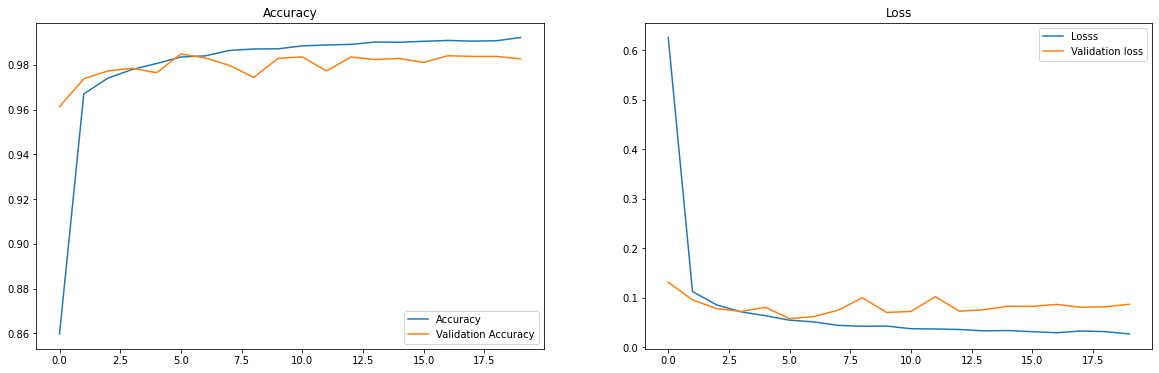

In [92]:
fig,ax = plt.subplots(1,2, figsize=(20, 6))
ax[0].plot(history_2.history['accuracy'],label="Accuracy")
ax[0].plot(history_2.history['val_accuracy'],label="Validation Accuracy")
ax[0].set_title("Accuracy")
ax[0].legend()


ax[1].plot(history_2.history['loss'],label="Losss")
ax[1].plot(history_2.history['val_loss'],label="Validation loss")
ax[1].set_title("Loss")
ax[1].legend()

Ora provo a testare la rete sui i numeri scritti da me a mano


In [140]:
from tensorflow.keras.preprocessing import image
img=[]
for i in range(10):
    img.append(image.load_img("Numeri_ACL/"+str(i)+"A.png", target_size=(28, 28),color_mode="grayscale"))

In [150]:
im_nn=[]
for i in inverted_img:
    im_nn.append( image.img_to_array(i))

im_nn=np.array(im_nn)
print(im_nn.shape)

(10, 28, 28, 1)


In [160]:
prediction=model_CNN_2.predict(im_nn)

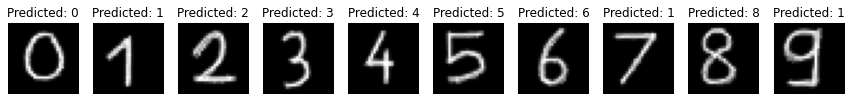

In [161]:
plt.figure(figsize=(15,15))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)  
    plt.imshow(im_nn[i, :, :, 0], cmap='gray')    
    plt.title("Predicted: {}".format(np.argmax(prediction[i])))
    plt.axis('off') 
plt.show()

La mia rete neurale dopo un training di 20 epoche riesce a riconoscere correttamente 8 numeri su 10. I due che non è riuscita a riconoscere sono il numero 7 ed il numero 9.